<p style="text-align: center;"><font size="8"><b>Numerical Calculus</b></font><br>

In science and engineering (and lots of other disciplines), a common task is to evaluate derivatives or integrals. 

You probably already know how to take the derivative of a function, and how to compute (certain) integrals by hand (analytically). Often however, evaluating these quantities can be challenging or impossible analytically. Using a computer, we can come up with an approximation to these quantities.

# Derivatives

In calculus you learnt how to take the derivative of a function. For example:

- $ \frac{\text{d}}{\text{d}x} x^2 = 2x$

- $ \frac{\text{d}}{\text{d}x} \sin(x) = \cos(x)$

Using the chain rule and product rule, we can compute more complicated derivatives:
$$ \frac{\text{d}}{\text{d}x} \sin(x^2\cos(e^x)) = ?$$

So what's the problem? Using the chain rule and product rule may be cumbersome, but it's possible. 

Well that's true. But what about a function like this:
$$ f(x) = \prod\limits_{k=1}^{100} x^k\left(\sin\left(k\prod\limits_{m=1}^k xe^{\cos^{m}(x^2)}\right)\right).$$

Would you want to take the derivative of that?

It turns out that seeing functions like that isn't actually very common in most applications. Most functions you have to deal with can be differentiated by applying the chain rule once or twice. 

A more common task however, is to compute the derivative of function without being given $f(x)$. 

Consider a running app that keeps track of the runner's position at discrete time intervals. The data might look like:

| time (s)| distance (m)|
|-----------|------|
|0 | 0 |
|10 | 50|
|20 | 100|
|30 | 140|
|40 | 180|

How fast is the runner running at $t=30$? We know that velocity is the derivative of the position, i.e. $v(t) = \text{d}/\text{dt} (d(t))$. How can we compute this from the data provided by the app?

Another task where we are not given $f(x)$ but are interested in its derivative is where we are asked to solve an equation for $f(x)$ involving its derivative, for example:
$$ \frac{\text{d}}{\text{d}x} f(x) = x^3\sin(x).$$

This is called an *ordinary differential equation* (ODE). We'll cover techniques to solve ODEs in a few weeks.

## Finite Difference
 
Remember from early calculus when you learnt the definition of the derivative. Given a function $y(x)$, the derivative $y'(x)$ is defined by the limit:

$$ y'(x) = \lim\limits_{\Delta x\to 0} \frac{y(x + \Delta x) - y(x)}{\Delta x} $$

We can think of this as the limit of the slope of the secant line going through $f(x)$ and $f(x + \Delta x)$.

![derivative animation](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/derivative.gif?raw=true)


This is the exact definition of a derivative. If we are willing to sacrifice some accuracy, we can *approximate* the derivative of a function by:
$$ f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}.$$

For large $\Delta x$ this might be a bad approximation, but as $\Delta x$ becomes closer to 0, the approximation becomes better. This is known as *finite difference*. 

We can use this formula to answer a question from earlier. Given this time vs. distance data, how fast is the runner running at $t=30$?

| time (s)| distance (m)|
|-----------|------|
|0 | 0 |
|10 | 50|
|20 | 100|
|30 | 140|
|40 | 180|

In other words, if we call our distance function $d(t)$, what is $d'(30)$? 


We can plot our data by putting the time and distances into lists.

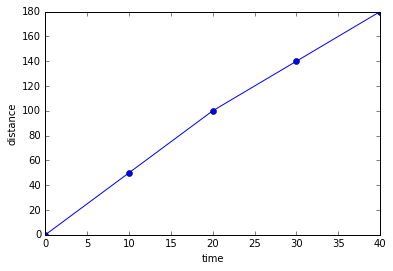

In [2]:
t = [0,10,20,30,40]
d = [0,50,100,140,180]

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(t,d, "-o")
plt.xlabel("time")
plt.ylabel("distance")


The finite difference formula is essentially a calculation of the slope of the line that connects $d(30)$ and $d(40)$. 

(0, 45)

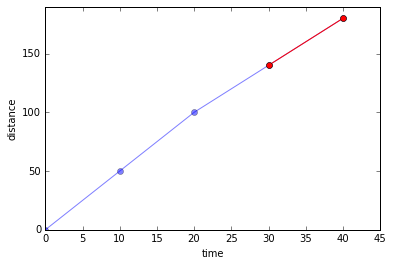

In [6]:
plt.plot(t,d, "-o",alpha=0.5) #alpha controls the opacity
plt.plot([t[3],t[4]],[d[3],d[4]], "-or")
plt.xlabel("time")
plt.ylabel("distance")
plt.ylim([0,190])
plt.xlim([0,45])

From our finite difference formula:
$$ d'(30) \approx \frac{d(30 + \Delta t) - d(30)}{\Delta t}.$$

We know $d(30) = 140$. What is $\Delta t$? 

From our table we can see that if we take $\Delta t=10$, we can evaluate $d(30 + \Delta t) = d(40) = 180$. 

Plugging this all in:
$$ v(30) = d'(30) \approx \frac{180 - 140}{10} = 4 \text{m/s}.$$

There are different kinds of finite difference. The version on the last slide is known as *forward finite difference* because we are using the point $x$**+**$\Delta x$ to approximate the derivative.

We can also define a *backward finite difference*:
$$ f'(x) \approx \frac{f(x) - f(x-\Delta x)}{\Delta x}.$$

Or a *centered finite difference*:
$$ f'(x) \approx \frac{f(x + \Delta x) - f(x -\Delta x)}{2\Delta x}$$

In fact there are many other finite difference schemes availiable, but we'll limit ourselves to these three.

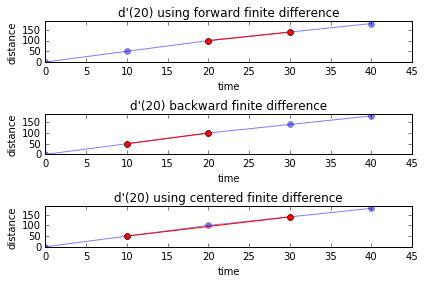

In [9]:
#hideme

plt.subplot(3,1,1)
plt.plot(t,d, "-o",alpha=0.5) #alpha controls the opacity
plt.plot([t[2],t[3]],[d[2],d[3]], "-or")
plt.xlabel("time")
plt.ylabel("distance")
plt.ylim([0,190])
plt.xlim([0,45])
plt.title("d'(20) using forward finite difference")

plt.subplot(3,1,2)
plt.plot(t,d, "-o",alpha=0.5) #alpha controls the opacity
plt.plot([t[1],t[2]],[d[1],d[2]], "-or")
plt.xlabel("time")
plt.ylabel("distance")
plt.ylim([0,190])
plt.xlim([0,45])
plt.title("d'(20) backward finite difference")

plt.subplot(3,1,3)
plt.plot(t,d, "-o",alpha=0.5) #alpha controls the opacity
plt.plot([t[1],t[3]],[d[1],d[3]], "-or")
plt.xlabel("time")
plt.ylabel("distance")
plt.ylim([0,190])
plt.xlim([0,45])
plt.title("d'(20) using centered finite difference")

plt.tight_layout()

Now we have three finite difference schemes. Which one should you use?

It turns out the centered finite diffence is the most accurate, so you should use this if you can. This might not always be possible. For example, given the data:

| time (s)| distance (m)|
|-----------|------|
|0 | 0 |
|10 | 50|
|20 | 90|
|30 | 140|
|40 | 180|

We can use centered finite difference to evaluate $v(30)$:
$$ v(30) = d'(30) \approx \frac{180 - 90}{20} = 4.5 \text{m/s}.$$
Notice that this is different from what we got using forward finite difference. 

What is $v(0) = d'(0)$? To use centered finite difference you'd need to know $d(-\Delta t)$, which is not known. So for this point we would have to use forward finite difference. Similarily at $t=40$, since we don't know $d(40+\Delta t)$, we would have to use backward finite difference to evaluate $d'(40)$.

So how do we program this? Let's first create a NumPy array that represents the data.

| time (s)| distance (m)|
|-----------|------|
|0 | 0 |
|10 | 50|
|20 | 90|
|30 | 140|
|40 | 180|


In [11]:
import numpy as np

data = np.array([[0,10,20,30,40],[0,50,90,140,180]])
print(data)

[[  0  10  20  30  40]
 [  0  50  90 140 180]]


We can use this array to compute $v(0)$ using forward finite difference. The first row of `data` is the time, the second row is the distance. Let's extract this data.

In [12]:
t = data[0] # first row of data
d = data[1] # second row of data

We'll need:
- d(0) : d[0]
- d(10) : d[1]

In addition, we'll need $\Delta t$. We can find this from:

$\Delta t$ = t[1] - t[0]


In [13]:
v0 = (d[1] - d[0])/(t[1] - t[0])
print(v0)

5.0


## Exercise


Use  backward finite difference to compute the runner's velocity at $t=20$.

Centered finite difference can be computed the same way. For example to compute the velocity at $t=10$ using centered finite difference we could call:

In [14]:
v1 = (d[2] - d[0])/(t[2] - t[0])
print(v1)

4.5


## Exercise 

Use centered finite difference to compute the runner's velocity at $t=20$.

Let's put this all together. We'll use forward difference to compute $v(0)$, centered difference to compute $v(10)$, $v(20)$ and $v(30)$ and backward difference to compute $v(40)$. 

Of course we can compute these values all individually. If the app provided much more data however, maybe 10000 points, computing the velocity for each point would become very cumbersome. Instead, let's use NumPy arrays and slicing to our advantage.

Since there's only ever two endpoints, we can compute those individually.

In [15]:
# left end, use forward difference
v_start = (d[1] - d[0])/(t[1] - t[0])

# right end, use backward difference
# index -1 is last entry, index -2 is second to last
v_end = (d[-1] - d[-2])/(t[-1] - t[-2])

The non-endpoints, of which there can be an arbitrary number, will be computed using centered difference. We will use slicing. 

Recall that centered finite difference takes the form:
$$ d'(t) \approx \frac{d(t+\Delta t) - f(t - \Delta t)}{\Delta t}$$

If we label each time-distance pair as $(t_i, d_i)$, then the derivative at each time $t_i$ can be written as:
$$ d'(t_i) \approx \frac{d(t_{i+1}) - d(t_{i-1})}{t_{i+1} - t_{i-1}}$$


We can store $d(t_{i+1})$, $d(t_{i-1})$, $t_{i+1}$ and $t_{i-1}$ as NumPy arrays:

$$ t_{i+1} = \langle 20,30,40\rangle$$
$$ t_{i-1} = \langle 0,10,20\rangle$$
$$ d(t_{i+1}) = \langle 90, 140, 180\rangle$$
$$ d(t_{i-1}) = \langle 0, 10, 20\rangle$$

In other words, the $i+1$ entries start at entry 2 (or 1 in Python indexing) and go on until the end. The $i-1$ entries start at entry 0 and go until 2 from the end (entry -2 in Python indexing). 

An implementation is below.

In [16]:
# non-endpoints, use centered difference
v = (d[2:]-d[:-2])/(t[2:]-t[:-2])

# put everything together
v = np.append(v_start, v)
v = np.append(v, v_end)

print(v)

[ 5.   4.5  4.5  4.5  4. ]


We can plot the distance and the velocity.

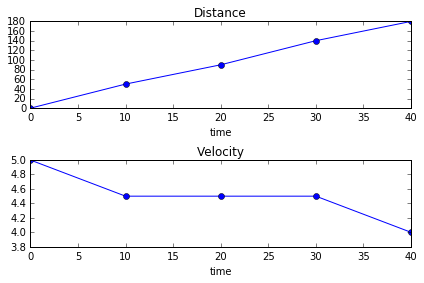

In [21]:
plt.subplot(2,1,1)
plt.plot(t, d, "-o")
plt.title("Distance")
plt.xlabel("time")
plt.subplot(2,1,2)
plt.plot(t,v,"-o")
plt.title("Velocity")
plt.xlabel("time")
plt.tight_layout()

## Exercise

Repeat this procedure to compute and plot the velocity of a runner as a function of time having the following time vs. distance data:

[[   0.            5.26315789   10.52631579   15.78947368   21.05263158
    26.31578947   31.57894737   36.84210526   42.10526316   47.36842105
    52.63157895   57.89473684   63.15789474   68.42105263   73.68421053
    78.94736842   84.21052632   89.47368421   94.73684211  100.        ]
 [   0.           -8.52122368   -8.91903859   -0.81420188    8.06682555
     9.25762867    1.62299723   -7.55886151   -9.5347456    -2.42101545
     7.00070459    9.74854923    3.20295747   -6.3960611    -9.89761987
    -3.96363099    5.74894603    9.98096763    4.69798492   -5.06365641]]


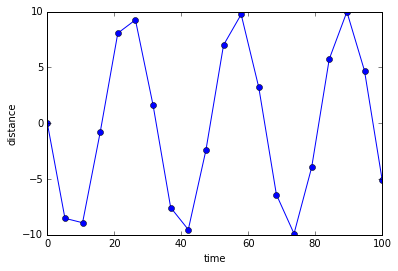

In [19]:
data = np.array([np.linspace(0,100,20), 10*np.sin(np.linspace(0, 100, 20))])
print(data)

plt.plot(data[0],data[1], '-o')
plt.xlabel("time")
plt.ylabel("distance")

# Integration

The reverse of differentiation is integration. In  many applications we need to integrate a function, i.e.

$$\int_0^{\pi} \sin(x)\text{d}x$$

This is easy enough. We know the antiderivative of $\sin(x)$ is $-\cos(x)$, so applying the fundamental theorem of calculus gives:
$$ \int_0^{\pi} \sin(x)\text{d}x = -\cos(\pi) - (-\cos(0)) = -(-1) + 1 = 2$$


What about the integral
$ \int_0^1 e^{x^2}\text{d}x$ ? 

You may remember from calculus that $e^{x^2}$ does not have an antiderivative. Unlike differentiation, where finding analytic expressions can be tedious, but is almost always possible, finding an analytic expression for an integral is often not possible. 

Of course, just because we don't have an antiderivative doesn't mean we don't have an integral. Remember that the integral above is simply "the area under the curve $y = e^{x^2}$ from $x=0$ to $x=1$". This value still exists.

![e^{x^2}](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/plot.png?raw=true)

So what can we do?

When you first learnt about integrals you probably went over Riemann sums to evaluate $\int_a^b f(x)\text{d}x$. 

We begin by breaking up the interval of integration $[a,b]$ into intervals of length $h$. Then the value of the function at a point $x^*$ in each interval (typically either right endpoint, left endpoint or center) determines a rectangle of height $f(x^*)$ and width $h$. The integral of $f(x)$ over $[a,b]$ is then approximated by the total area of these rectangles. You'll recall that as $h\to 0$, this approximation converges to the actual value of the integral. 

![left reimann sum](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/left_sum.png?raw=true)


Mathematically:

1) we split the domain $[a,b]$ into $N$ equally spaced intervals of width $h$

2) we take a point from each interval to form a set of points $\{x_1, x_2, \cdot x_N\}$

3) $\int_a^b f(x)\text{d}x \approx h\sum\limits_{i=0}^N f(x_i)$

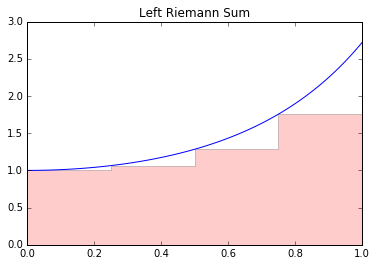

In [55]:
x_rem = [0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1]
y_rem = [np.exp(0), np.exp(0), np.exp(0.25**2), np.exp(0.25**2), \
        np.exp(0.5**2), np.exp(0.5**2), np.exp(0.75**2), np.exp(0.75**2)]
plt.fill_between(x_rem, 0, y_rem, facecolor="r", alpha = 0.2)
x = np.linspace(0,1,100)
plt.plot(x, np.exp(x**2))
plt.title("Left Riemann Sum")

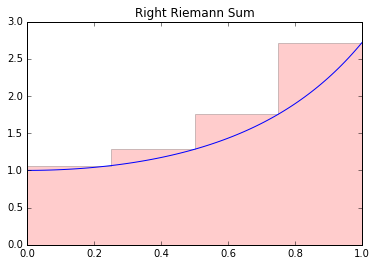

In [54]:
x_rem = [0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1]
y_rem = [np.exp(0.25**2), np.exp(0.25**2), np.exp(0.5**2), np.exp(0.5**2), \
        np.exp(0.75**2), np.exp(0.75**2), np.exp(1), np.exp(1)]
plt.fill_between(x_rem, 0, y_rem, facecolor="r", alpha = 0.2)
x = np.linspace(0,1,100)
plt.plot(x, np.exp(x**2))
plt.title("Right Riemann Sum")

In the limit $h\to 0$ this converges to the actual integral. Of course even if $h$ is not 0, it tells us something about the integral. As with finite differences, if we are willing to accept some error, we can take a non-zero $h$ and get an approximation to the integral. 

If $N$ is large enough (and consequently $h$ is small enough), this approximation might be quite good.

Lets look at how we could compute this. As a specific example we'll look at an integral we already know how to compute, and see how accurate we can get. Specifically we'll look at $\int_0^{\pi} \sin(x)\text{d}x = 2$.

The first thing we need to do is define the intervals. Say we want $N$ points, this means we'll have $N-1$ intervals and $h = \pi/(N-1)$. Recall that NumPy provides a function `linspace` that returns an `array` of equally spaced numbers.

In [24]:
N = 5
a = 0
b = np.pi
h = (b - a)/(N-1)
x = np.linspace(a, b, N)
print(x)

[ 0.          0.78539816  1.57079633  2.35619449  3.14159265]


Lets do the left Riemann sum. This means that we need the left endpoint of each interval. In our case this will be the points $\{0, \pi/4, \pi/2, 3\pi/4\}$, or all points except the last one. 

As we saw earlier with finite differences, arrays, like lists and strings support slicing.

In [25]:
x = x[:-1]
print(x)

[ 0.          0.78539816  1.57079633  2.35619449]


We now need to plug these values into our function, sum the function values up and multiply by $h$. 

Note that instead of using `math.sin(x)`, we will use `np.sin(x)`. The reason for this is that the math module is completely unaware of NumPy arrays. If we tried to pass in an array to `math.sin(x)` we would get an error. On the other hand `np.sin(x)` works with arrays, and returns an array containing the values of sine at all the points in `x`.

In [26]:
I = np.sum(np.sin(x))*h
print("error = ", abs(I - 2))

error =  0.103881102063


This isn't bad, but it's still off by about 5%. What happens if instead of 5 points we use 100 points?

In [27]:
N = 100
a = 0
b = np.pi
h = (b - a)/(N-1)
x = np.linspace(a, b, N)
x = x[:-1]
I = np.sum(np.sin(x))*h
print("error = ", abs(I - 2))

error =  0.000167836106007


## Exercise

Use the right Riemann sum with 100 points to evaluate the integral
$$ \int_0^{10} \sin^2(x)\text{d}x.$$

The exact value is $5 - \sin(20)/4$.